In [5]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [72]:
num_epochs = 500
batch_size = 1
learning_rate = 0.001

input_size = 222
sequence_length = 4
hidden_size = 128
num_layers = 2

In [73]:
initialize=True

In [74]:
df = pd.read_csv('../data/united_data.csv', index_col=0).fillna(0)
y = df['Corn_Yield']
X = df.drop(columns=['Corn_Yield'], axis=1)

In [75]:
class MyDataset(Dataset):
 
  def __init__(self,X,y):
    self.x_train=torch.tensor(X,dtype=torch.float32)
    self.y_train=torch.tensor(y,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [77]:
train_data=MyDataset(X_train.to_numpy(), y_train.to_numpy())
train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=False)

test_data=MyDataset(X_test.to_numpy(), y_test.to_numpy())
train_loader=DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [78]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32)


In [79]:
X_train.shape

torch.Size([879, 888])

In [80]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)
    def forward(self, x):
        if initialize:
            h0 = torch.zeros(num_layers, x.size(0), hidden_size)
            c0 = torch.zeros(num_layers, x.size(0), hidden_size)
            x, _ = self.lstm(x,(h0,c0))
        else:
            x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.linear(x)
        return x

In [81]:
model = LSTM(input_size, hidden_size, num_layers)

In [82]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (weather, labels) in enumerate(train_loader):  
        # origin shape: [N, 1, 28, 28]
        # resized: [N, 28, 28]
        weather = weather.reshape(-1, sequence_length, input_size)
        
        # Forward pass
        outputs = model(weather)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

C:\Morgan Stanley\quant-challenge\venv\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/500], Step [100/293], Loss: 507.2838
Epoch [1/500], Step [200/293], Loss: 967.3977
Epoch [2/500], Step [100/293], Loss: 106.2689
Epoch [2/500], Step [200/293], Loss: 0.9366
Epoch [3/500], Step [100/293], Loss: 1317.0787
Epoch [3/500], Step [200/293], Loss: 529.6073
Epoch [4/500], Step [100/293], Loss: 3195.2009
Epoch [4/500], Step [200/293], Loss: 1715.2522
Epoch [5/500], Step [100/293], Loss: 5114.5293
Epoch [5/500], Step [200/293], Loss: 3002.0051
Epoch [6/500], Step [100/293], Loss: 6718.8271
Epoch [6/500], Step [200/293], Loss: 4085.0317
Epoch [7/500], Step [100/293], Loss: 7580.4849
Epoch [7/500], Step [200/293], Loss: 1446.0708
Epoch [8/500], Step [100/293], Loss: 6573.0547
Epoch [8/500], Step [200/293], Loss: 674.9554
Epoch [9/500], Step [100/293], Loss: 3880.4187
Epoch [9/500], Step [200/293], Loss: 1054.8951
Epoch [10/500], Step [100/293], Loss: 2905.1797
Epoch [10/500], Step [200/293], Loss: 61.6977
Epoch [11/500], Step [100/293], Loss: 773.8547
Epoch [11/500], Step 

Epoch [90/500], Step [100/293], Loss: 0.3837
Epoch [90/500], Step [200/293], Loss: 151.9917
Epoch [91/500], Step [100/293], Loss: 2.5618
Epoch [91/500], Step [200/293], Loss: 88.4439
Epoch [92/500], Step [100/293], Loss: 0.9075
Epoch [92/500], Step [200/293], Loss: 116.7095
Epoch [93/500], Step [100/293], Loss: 11.1403
Epoch [93/500], Step [200/293], Loss: 304.4441
Epoch [94/500], Step [100/293], Loss: 2.0550
Epoch [94/500], Step [200/293], Loss: 6.2670
Epoch [95/500], Step [100/293], Loss: 0.1233
Epoch [95/500], Step [200/293], Loss: 1.5572
Epoch [96/500], Step [100/293], Loss: 6.9726
Epoch [96/500], Step [200/293], Loss: 3.6464
Epoch [97/500], Step [100/293], Loss: 8.4961
Epoch [97/500], Step [200/293], Loss: 4.6100
Epoch [98/500], Step [100/293], Loss: 29.2068
Epoch [98/500], Step [200/293], Loss: 6.4264
Epoch [99/500], Step [100/293], Loss: 17.7557
Epoch [99/500], Step [200/293], Loss: 0.4684
Epoch [100/500], Step [100/293], Loss: 26.9366
Epoch [100/500], Step [200/293], Loss: 69.7

Epoch [178/500], Step [200/293], Loss: 236.8733
Epoch [179/500], Step [100/293], Loss: 6.7877
Epoch [179/500], Step [200/293], Loss: 0.1210
Epoch [180/500], Step [100/293], Loss: 28.7708
Epoch [180/500], Step [200/293], Loss: 71.8456
Epoch [181/500], Step [100/293], Loss: 116.0759
Epoch [181/500], Step [200/293], Loss: 20.9404
Epoch [182/500], Step [100/293], Loss: 12.9940
Epoch [182/500], Step [200/293], Loss: 11.8501
Epoch [183/500], Step [100/293], Loss: 19.5026
Epoch [183/500], Step [200/293], Loss: 0.0004
Epoch [184/500], Step [100/293], Loss: 14.7847
Epoch [184/500], Step [200/293], Loss: 22.5405
Epoch [185/500], Step [100/293], Loss: 6.3631
Epoch [185/500], Step [200/293], Loss: 0.2825
Epoch [186/500], Step [100/293], Loss: 8.6932
Epoch [186/500], Step [200/293], Loss: 14.6153
Epoch [187/500], Step [100/293], Loss: 1.5646
Epoch [187/500], Step [200/293], Loss: 8.1918
Epoch [188/500], Step [100/293], Loss: 4.6605
Epoch [188/500], Step [200/293], Loss: 11.9188
Epoch [189/500], Ste

Epoch [267/500], Step [100/293], Loss: 0.2026
Epoch [267/500], Step [200/293], Loss: 19.3636
Epoch [268/500], Step [100/293], Loss: 2.0037
Epoch [268/500], Step [200/293], Loss: 4.4181
Epoch [269/500], Step [100/293], Loss: 0.7077
Epoch [269/500], Step [200/293], Loss: 15.6269
Epoch [270/500], Step [100/293], Loss: 1.8425
Epoch [270/500], Step [200/293], Loss: 15.5646
Epoch [271/500], Step [100/293], Loss: 2.4800
Epoch [271/500], Step [200/293], Loss: 26.3518
Epoch [272/500], Step [100/293], Loss: 6.2560
Epoch [272/500], Step [200/293], Loss: 39.4993
Epoch [273/500], Step [100/293], Loss: 5.9664
Epoch [273/500], Step [200/293], Loss: 0.1176
Epoch [274/500], Step [100/293], Loss: 3.4611
Epoch [274/500], Step [200/293], Loss: 69.5177
Epoch [275/500], Step [100/293], Loss: 7.8059
Epoch [275/500], Step [200/293], Loss: 40.1358
Epoch [276/500], Step [100/293], Loss: 48.4627
Epoch [276/500], Step [200/293], Loss: 0.1044
Epoch [277/500], Step [100/293], Loss: 0.5820
Epoch [277/500], Step [200

Epoch [356/500], Step [100/293], Loss: 3.1983
Epoch [356/500], Step [200/293], Loss: 6.3610
Epoch [357/500], Step [100/293], Loss: 0.6361
Epoch [357/500], Step [200/293], Loss: 3.3340
Epoch [358/500], Step [100/293], Loss: 0.1075
Epoch [358/500], Step [200/293], Loss: 0.5891
Epoch [359/500], Step [100/293], Loss: 5.0383
Epoch [359/500], Step [200/293], Loss: 0.0436
Epoch [360/500], Step [100/293], Loss: 0.2552
Epoch [360/500], Step [200/293], Loss: 2.0834
Epoch [361/500], Step [100/293], Loss: 3.0714
Epoch [361/500], Step [200/293], Loss: 2.1952
Epoch [362/500], Step [100/293], Loss: 1.6748
Epoch [362/500], Step [200/293], Loss: 3.5215
Epoch [363/500], Step [100/293], Loss: 0.0272
Epoch [363/500], Step [200/293], Loss: 0.0336
Epoch [364/500], Step [100/293], Loss: 0.6009
Epoch [364/500], Step [200/293], Loss: 3.2613
Epoch [365/500], Step [100/293], Loss: 4.4435
Epoch [365/500], Step [200/293], Loss: 5.0321
Epoch [366/500], Step [100/293], Loss: 0.3330
Epoch [366/500], Step [200/293], L

Epoch [445/500], Step [100/293], Loss: 16.9547
Epoch [445/500], Step [200/293], Loss: 0.0310
Epoch [446/500], Step [100/293], Loss: 9.4107
Epoch [446/500], Step [200/293], Loss: 2.9547
Epoch [447/500], Step [100/293], Loss: 1.9763
Epoch [447/500], Step [200/293], Loss: 19.3045
Epoch [448/500], Step [100/293], Loss: 3.8899
Epoch [448/500], Step [200/293], Loss: 36.6369
Epoch [449/500], Step [100/293], Loss: 0.5004
Epoch [449/500], Step [200/293], Loss: 4.7645
Epoch [450/500], Step [100/293], Loss: 0.9521
Epoch [450/500], Step [200/293], Loss: 22.0699
Epoch [451/500], Step [100/293], Loss: 0.1452
Epoch [451/500], Step [200/293], Loss: 2.1205
Epoch [452/500], Step [100/293], Loss: 0.0337
Epoch [452/500], Step [200/293], Loss: 5.6567
Epoch [453/500], Step [100/293], Loss: 0.0002
Epoch [453/500], Step [200/293], Loss: 0.0968
Epoch [454/500], Step [100/293], Loss: 0.0004
Epoch [454/500], Step [200/293], Loss: 6.4282
Epoch [455/500], Step [100/293], Loss: 0.0454
Epoch [455/500], Step [200/293

In [85]:
weather = X_test.reshape(-1, sequence_length, input_size)
labels = y_test
outputs = model(weather)
loss = criterion(outputs.reshape(-1), labels)
loss

tensor(19.2408, grad_fn=<MseLossBackward0>)

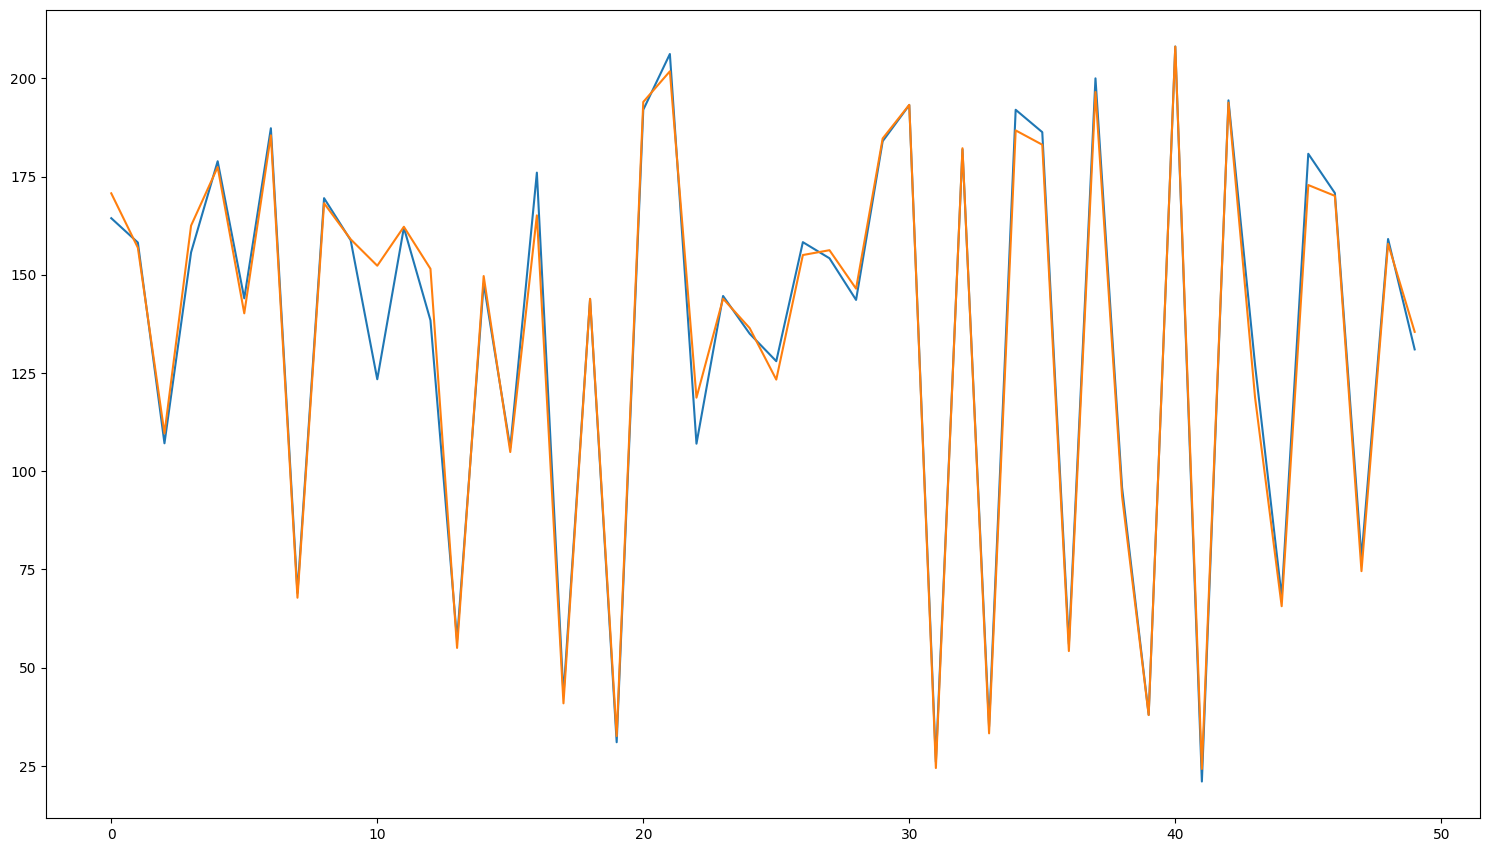

In [90]:
plt.plot(y_test[:50])
plt.plot(outputs[:50].detach())
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [91]:
torch.save(model.state_dict(), "lstm_500_2_128")